In [8]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

duration = 10000
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1

def write(name,obs):
    f=open(name,'w')
    data = np.array(obs.data()).T
    np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
    f.close()        
    print('saving into',name)        

def singlerun(rm,D,solver='ode',intrinsic=False):   
    K=int(L/2/rm)
    print(solver,'K',K)
    V = L**3 
    Nb=100
    Na = 500
    dt = (2*rm)**2 / (6*D)
    print(Na,Nb)
    #solver = ('meso', Integer3(K,K,K))        
    keff = k0/Ca/Cb

    with species_attributes():
        A | {'D': D}
        B | {'D': D}

    with reaction_rules():
        ~A > A | k0
        A + B >B | (ka if intrinsic else keff)
        #A > ~A | keff
    m = get_model()
    print('rm={:.3},D={:.3}'.format(rm,D))
    print('kon={:.3},keff={:.3},V={:.3}'.format(k0,keff,V))    
    w = gillespie.GillespieWorld(Real3(L,L,L))
    w.bind_to(m)
    w.add_molecules(Species('B'),Nb)
    w.add_molecules(Species('A'),Na)
    sim = gillespie.GillespieSimulator(w)    
    #print('rm={:.3},D={:.3}'.format(rm,D))
    #print('kon={:.3},ka={:.3},kd={:.3},keff={:.3},kfactor={:.3},V={:.3}'.format(k0,ka,kd,keff,ka/kd,V))
    obs = FixedIntervalNumberObserver(dt, ['A'])
    sim.run(duration,obs)
    data = np.array(obs.data()).T
    print('mean [A]',np.mean(data[1][50:])/V)   
    write('/home/chew/outputdata/sturrock_gillespie_rm{:.3}_D{:.3}_L{:.3}_dur{}'.format(rm,D,L,duration),obs)
    #write('/home/chew/outputdata/sturrock_bd_{}_rm{:.3}_D{:.3}_L{:.3}b_dur{}'.format('egfrd',rm,D,L,duration),obs)
    return obs

for job in [[0.5,0.1]]:#[[0.02,0.02],[0.05,0.01]]:#[0.05,0.1],[0.05,0.01]]:
    obs=singlerun(job[0],job[1],'gillespie',False)
    #obs=singlerun(job[0],job[1],'G',False,simrun)

    

gillespie K 4
500 100
rm=0.5,D=0.1
kon=0.1,keff=0.02,V=1e+02
mean [A] 4.96394387498
saving into /home/chew/outputdata/sturrock_gillespie_rm0.5_D0.1_L4.64_dur10000


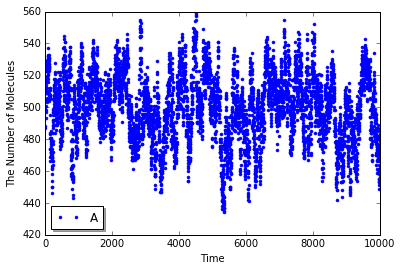

In [7]:
viz.plot_number_observer(obs,'r.')